In [1]:
import csv
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



# possible discrete distributions: bernouli, binomial, nbinomial, geometric, poisson
# possible continuous distributions: normal, gamma, exponential, uniform
# Given that these data points were taken continuously, and regard a natural phenomenon, our first guess is that 
# we should use the normal distribution to describe these phenomena

from scipy.stats import norm

In [2]:
#### CONTINUOUS DISTRIBUTION DEFINITIONS ####
# normal: useful for describing random naturally occuring phenomena. Based on mean and standard dev
# gamma: useful for modeling data that should have a continuous and positively skewed nature. Based on shape and rate
# uniform: useful for modeling data that has equal probability of occuring
# exponential: usefol for modeling the probability distribution of time before events

In [4]:
# read csv file
df_farm = pd.read_csv("C:\\Users\\joshu\\Documents\\DSCI125\\Projects\\Proj#5\\agriculturalData.csv")

In [5]:
# print the head of the data frame to test
#df_farm.head()
#plt.plot(df_farm)

In [6]:
# number of columns = amount of time
# each increment of time is 10 minutes
df_farm.shape

(13247, 3)

In [7]:
# set useful constants
num_data_points = 13247

time_increments_per_day = 144
sample_size = time_increments_per_day

num_days_june = 30
june_len = num_days_june * 144

num_days_july = 31
july_len = num_days_july * 144

num_days_august = 31
aug_len = num_days_august * 144

june_july = june_len + july_len

num_days_df = num_days_june + num_days_july + num_days_august

first_temp = 44.309
first_wind = 11.602



In [9]:
# initialize an array for temperature measurements in degrees F
flat_farm = df_farm.to_numpy()
flat_farm.flatten()
temp = np.zeros(num_data_points)
for i in range(num_data_points):
    if i == 0:
        temp[i] = first_temp
    else:
        temp[i] = flat_farm[i][1]
temp[:4]


array([44.309, 35.501, 53.018, 58.87 ])

In [10]:
# initialize wind measurements in mph
wind = np.zeros(num_data_points)
for i in range(num_data_points):
    if i == 0:
        wind[i] = first_wind
    else:
        wind[i] = flat_farm[i][2]
wind[:4]

array([11.602 ,  8.9213, 13.22  , 10.275 ])

Text(0.5, 1.0, 'Wind Speed (mph)')

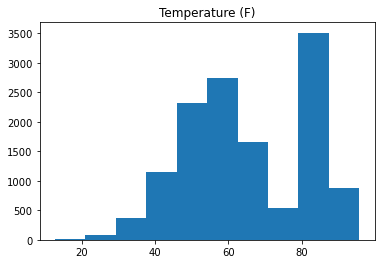

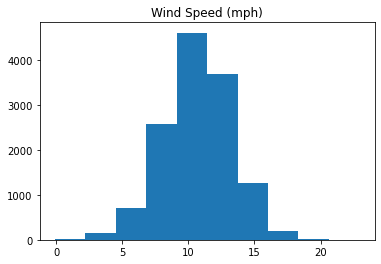

In [11]:
fig1 = plt.figure(1)
#fig1.tight_layout(pad=5.0)
#plt.subplot(2,2,1)
plt.hist(temp,bins=10)
plt.title("Temperature (F)")

fig2 = plt.figure(2)
#fig2.tight_layout(pad=5.0)
#plt.subplot(2,2,2)
plt.hist(wind,bins=10)
plt.title("Wind Speed (mph)")

In [12]:
# calculate mean and standard deviation for normal distribution sampling
temp_mean = np.mean(temp)
wind_mean = np.mean(wind)
temp_sd = np.std(temp)
wind_sd = np.std(wind)
print('average temperature ' + str(temp_mean))
print('average wind speed ' + str(wind_mean))
print('standard deviation in temperature ' + str(temp_sd))
print('standard deviation in wind speed ' + str(wind_sd))

average temperature 65.1454499131879
average wind speed 10.677210868045595
standard deviation in temperature 16.493111616028717
standard deviation in wind speed 2.5709718354990247


In [13]:
# compute normal distribution statistics
temp_pdf = norm.pdf(temp, loc = temp_mean, scale = temp_sd)
wind_pdf = norm.pdf(wind, loc = wind_mean, scale = wind_sd)
print(temp_pdf)
print(wind_pdf)

[0.01089013 0.00480944 0.01845874 ... 0.01318478 0.01090089 0.01665839]
[0.145451   0.12289188 0.0951481  ... 0.06901315 0.15351933 0.09858582]


In [43]:
# initialize 3 sample distributions form temperature and for wind
temp_june = temp[:june_len]
temp_july = temp[june_len:june_july]
temp_aug = temp[june_july:]

wind_june = wind[:june_len]
wind_july = wind[june_len:june_july]
wind_aug = wind[june_july:]

print(temp_aug)

[82.021 80.267 84.95  ... 83.315 85.969 79.39 ]


Text(0.5, 1.0, 'Temperature in August (F)')

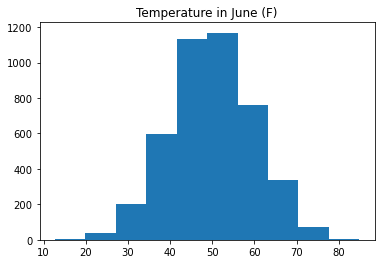

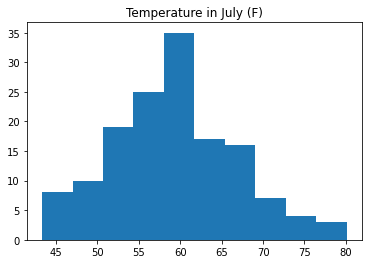

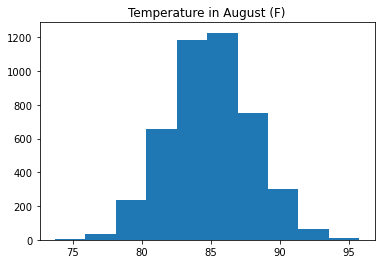

In [15]:
# initialize temperature plots by month

fig3 = plt.figure(3)
#plt.subplot(2,2,1)
plt.hist(temp_june,bins=10)
plt.title("Temperature in June (F)")

fig4 = plt.figure(4)
#plt.subplot(2,2,2)
plt.hist(temp_july,bins=10)
plt.title("Temperature in July (F)")

fig5 = plt.figure(5)
#plt.subplot(2,2,3)
plt.hist(temp_aug,bins=10)
plt.title("Temperature in August (F)")

In [52]:
june_temp_mean = np.mean(temp_june)
july_temp_mean = np.mean(temp_july)
aug_temp_mean = np.mean(temp_aug)

june_temp_sd = np.std(temp_june)
july_temp_sd = np.std(temp_july)
aug_temp_sd = np.std(temp_aug)

print('average temperature june ' + str(june_temp_mean))
print('average temperature july ' + str(july_temp_mean))
print('average temperature august ' + str(aug_temp_mean))
print('standard deviation in temperature june ' + str(june_temp_sd))
print('standard deviation in temperature july ' + str(july_temp_sd))
print('standard deviation in temperature august ' + str(aug_temp_sd))

average temperature june 49.98429375
average temperature july 60.02541263440861
average temperature august 84.94200851445217
standard deviation in temperature june 9.946466350942123
standard deviation in temperature july 7.8859882444075176
standard deviation in temperature august 2.9712194994382206


Text(0.5, 1.0, 'Wind in August (mph)')

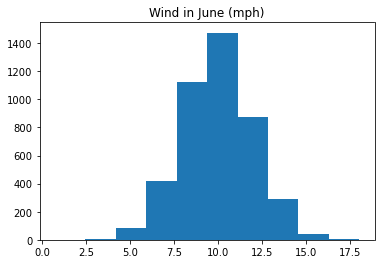

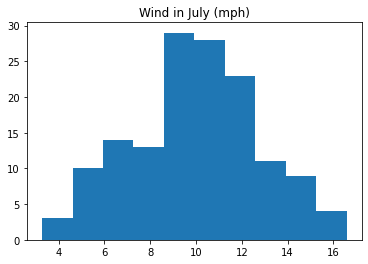

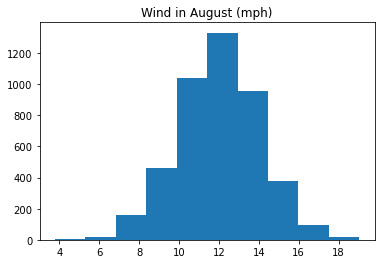

In [16]:
# # initialize wind plots by month

fig6 = plt.figure(6)
#plt.subplot(2,2,1)
plt.hist(wind_june,bins=10)
plt.title("Wind in June (mph)")

fig7 = plt.figure(7)
#plt.subplot(2,2,2)
plt.hist(wind_july,bins=10)
plt.title("Wind in July (mph)")

fig8 = plt.figure(8)
#plt.subplot(2,2,3)
plt.hist(wind_aug,bins=10)
plt.title("Wind in August (mph)")

In [53]:
june_wind_mean = np.mean(wind_june)
july_wind_mean = np.mean(wind_july)
aug_wind_mean = np.mean(wind_aug)

june_wind_sd = np.std(wind_june)
july_wind_sd = np.std(wind_july)
aug_wind_sd = np.std(wind_aug)

print('average wind speed june ' + str(june_wind_mean))
print('average wind speed july ' + str(july_wind_mean))
print('average wind speed august ' + str(aug_wind_mean))
print('standard deviation in wind speed june ' + str(june_wind_sd))
print('standard deviation in wind speed july ' + str(july_wind_sd))
print('standard deviation in wind speed august ' + str(aug_wind_sd))

average wind speed june 9.978825145833333
average wind speed july 10.00941329278674
average wind speed august 12.02116665919785
standard deviation in wind speed june 1.9982199343708313
standard deviation in wind speed july 2.9763601644293773
standard deviation in wind speed august 2.0418971974361986


In [ ]:
# june_increments = df_farm[1:june_len + 1]
# july_incrementss = df_farm[1:july_len + 1]
# august_incrementss = df_farm[1:august_len + 1]


In [ ]:
# poisson.rsv(lambda_gat)all, size = num_samples)
# NOT A POISSON

In [51]:
#Answering question 1: Price for each month at $6 per 1000 gallons and 1000 gallons per hour. Double price when temp above 85 and wind above 10
# 1 time increment = 10 mins = $1 regular price or 2 doubled

june_cost = 0
for sample in range(june_len):
    if temp_june[sample] > 85 and wind_june[sample] > 10:
        june_cost += 2
    else:
        june_cost += 1
print(june_cost)

july_cost = 0
for sample in range(july_len):
    if temp_july[sample] > 85 and wind_july[sample] > 10:
        july_cost += 2
    else:
        july_cost += 1
print(july_cost)

aug_cost = 0
for sample in range(aug_len - 1):
    if temp_aug[sample] > 85 and wind_aug[sample] > 10:
        aug_cost += 2
    else:
        aug_cost += 1
print(aug_cost)

4320
4467
6321
